## Process Synthetic Email Validation Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
# Replace these with the paths to your actual CSV files
csv_file_1 = 'synthetic/1_paraphrased_phishing_emails.csv'
csv_file_2 = 'synthetic/2_paraphrased_phishing_emails.csv'
csv_file_3 = 'synthetic/3_paraphrased_phishing_emails.csv'
csv_file_4 = 'synthetic/4_paraphrased_phishing_emails.csv'

# Read each CSV file into a DataFrame
df1 = pd.read_csv(csv_file_1)
df2 = pd.read_csv(csv_file_2)
df3 = pd.read_csv(csv_file_3)
df4 = pd.read_csv(csv_file_4)

# Combine the DataFrames into one
synthetic_validation_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the combined DataFrame
print(synthetic_validation_df)

                                                   text  label  \
0     wc 551 revision and notice of force majeure ( ...      0   
1     start date : 12 / 18 / 01 ; hourahead hour : 9...      0   
2     free live sexxx ! ! ! ! * * * * * * * * * * * ...      1   
3     On Tue, 10 Sep 2002 10:29:26 -0400  Tom Reingo...      0   
4     http://www.hughes-family.org/bugzilla/show_bug...      0   
...                                                 ...    ...   
2467  73 % off for all new software . brevets richne...      1   
2468  ourr new great offr how to save on inflate you...      1   
2469  MEET OTHER SINGLES              JUST LIKE YOU ...      1   
2470  bike bike to work month starts tuesday ! all w...      0   
2471  hi hello , those &quot; fat &quot; mortgage pa...      1   

                                       paraphrased_text  
0     Dear All,\n\nPlease find attached the revised ...  
1     \nWe would like to inform you that no ancillar...  
2     Dear valued members and int

In [3]:
# Drop the original 'Email Text' column 
synthetic_validation_df = synthetic_validation_df.drop(columns=['text'])

In [4]:
cols = synthetic_validation_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['paraphrased_text', 'label']

In [5]:
synthetic_validation_df=synthetic_validation_df[cols]

In [6]:
synthetic_validation_df = synthetic_validation_df.rename(columns={'paraphrased_text': 'text'})

In [7]:
synthetic_validation_df

,text,label
0,"Dear All,\n\nPlease find attached the revised ...",0
1,\nWe would like to inform you that no ancillar...,0
2,Dear valued members and interested individuals...,1
3,\nWe've discontinued the use of Outlook in our...,0
4,I'm glad to take on the task of resolving bug ...,0
...,...,...
2467,I'm excited to share with you a special offer ...,1
2468,"\nDear valued customer,\n\nAre you tired of in...",1
2469,Are you tired of searching for love in all the...,1
2470,"Hi everyone,\nAs a reminder, the month-long c...",0


label
1    1248
0    1224
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

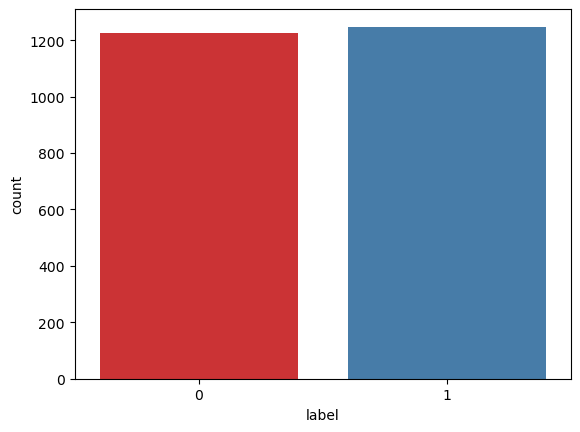

In [8]:
# Check the distribution of labels
print(synthetic_validation_df['label'].value_counts())

sns.countplot(x = 'label', data = synthetic_validation_df, palette = 'Set1')

## Set 1: ET + UT

In [9]:
# Load the dataset
email_train_df = pd.read_csv('email_train_dataset_unbalance.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
email_train_df.head()

,text,label
0,It doesn&#x27;t really matter since they&#x27;...,0
1,www.low-interest-rates.net Â Â Â Â Â Â quotepo...,1
2,home delivery cia &quot; lis soft ` tabs new c...,1
3,link correction : 10 million $ sweepstakes dow...,1
4,julies cam info hi . . . . my name is julie . ...,1


In [53]:
# Load the dataset
url_train_df = pd.read_csv('url_train_dataset_unbalance.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
url_train_df.head()

,text,label
0,https://demo3.cloudwp.dev/trial-x76422v1/xx/sw...,1
1,https://fictional-bassoon-boat.pages.dev,1
2,https://home-106362.weeblysite.com/,1
3,https://evri-track-f2cfa.firebaseapp.com/,1
4,counter.yadro.ru,0


In [54]:
# Combine the DataFrames into one
set_1_df = pd.concat([email_train_df, url_train_df], ignore_index=True)

In [55]:
set_1_df = set_1_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Display the combined DataFrame
set_1_df.head(50)

In [58]:
set_1_df.to_csv('set_1_df_imbalance.csv', index=False)

## Set 2: EV + UV

In [59]:
# Load the dataset
email_validation_df = pd.read_csv('email_validation_dataset_unbalance.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
email_validation_df.head()

,text,label
0,Here&#x27;s a weird and wacky problem:I&#x27;m...,0
1,"re : 6 . 1049 , sum : e - mail citation on occ...",0
2,-----BEGIN PGP SIGNED MESSAGE----- Hash: SHA1&...,0
3,lose weight now with phentermine offshore onli...,1
4,Have you tried rebuilding your package on a sy...,0


In [60]:
# Load the dataset
url_validation_df = pd.read_csv('url_validation_dataset_unbalance.csv')  # Adjust the file path as needed

# Display the first few rows of the dataset
url_validation_df.head()

,text,label
0,quoteinvestigator.com,0
1,https://shaw-103153.weeblysite.com/,1
2,11584727.fls.doubleclick.net,0
3,https://pub-1721223c23f3457fbb7eda7f3215db44.r...,1
4,9081776.fls.doubleclick.net,0


In [61]:
# Combine the DataFrames into one
set_2_df = pd.concat([email_validation_df, url_validation_df], ignore_index=True)
set_2_df = set_2_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
# Display the combined DataFrame
set_2_df.head()

,text,label
0,new books in phonetics &amp; phonology phoneti...,0
1,https://7771.wujutang.club,1
2,https://sparklogistics.com.ua/temps/,1
3,https://sbikycupdate-249.pages.dev,1
4,functions of language www home page content - ...,0


In [63]:
set_2_df.to_csv('set_2_df_imbalance.csv', index=False)

## Set 3: SEV + UV

In [ ]:
# Combine the DataFrames into one
set_3_df = pd.concat([synthetic_validation_df, url_validation_df], ignore_index=True)
set_3_df = set_3_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Display the combined DataFrame
set_3_df.head()

In [ ]:
# Check the distribution of labels
print(set_3_df['label'].value_counts())

sns.countplot(x = 'label', data = set_3_df, palette = 'Set1')

In [ ]:
set_3_df.to_csv('set_3_df.csv', index=False)

In [10]:
synthetic_validation_df.to_csv('synthetic_validation_df.csv', index=False)